   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.4 MB/s eta 0:00:00


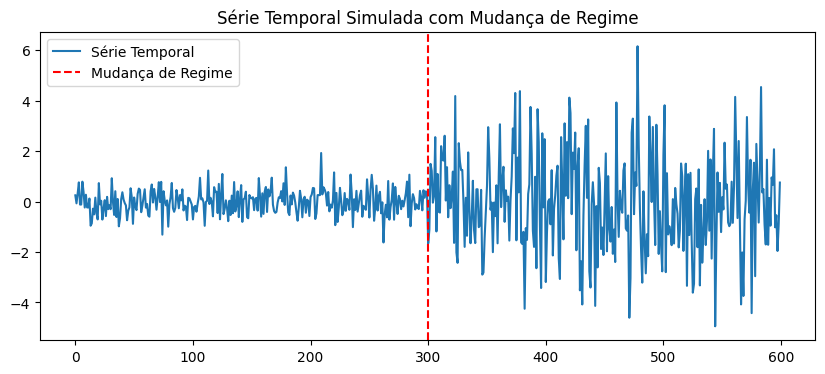

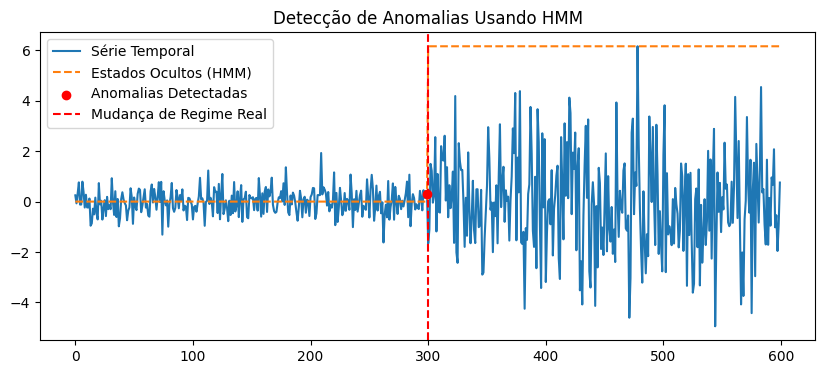

In [2]:
!pip install hmmlearn

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# 1. Simulação de uma série temporal com mudanças de regime
np.random.seed(42)

# Simular dois regimes de volatilidade
n = 300
regime_1 = np.random.normal(0, 0.5, size=n)
regime_2 = np.random.normal(0, 2, size=n)

# Combinar os regimes com uma mudança abrupta no meio
data = np.concatenate([regime_1, regime_2])

# Plotar a série temporal simulada
plt.figure(figsize=(10, 4))
plt.plot(data, label='Série Temporal')
plt.axvline(x=n, color='r', linestyle='--', label='Mudança de Regime')
plt.title('Série Temporal Simulada com Mudança de Regime')
plt.legend()
plt.show()

# 2. Ajustar um HMM Gaussiano à série temporal
# Reformatar os dados para o formato que o HMM espera
X = data.reshape(-1, 1)

# Definir o modelo HMM (vamos usar 2 estados ocultos, já que sabemos que há 2 regimes)
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model.fit(X)

# 3. Prever os estados ocultos (regimes) e as probabilidades associadas
hidden_states = model.predict(X)

# 4. Detectar anomalias com base em transições de regime
# Anomalias podem ser definidas como mudanças repentinas de estado oculto
anomalies = np.where(np.diff(hidden_states) != 0)[0]

# 5. Plotar os resultados com as anomalias destacadas
plt.figure(figsize=(10, 4))
plt.plot(data, label='Série Temporal')
plt.plot(hidden_states * max(data), '--', label='Estados Ocultos (HMM)')
plt.scatter(anomalies, data[anomalies], color='red', label='Anomalias Detectadas', zorder=5)
plt.axvline(x=n, color='r', linestyle='--', label='Mudança de Regime Real')
plt.title('Detecção de Anomalias Usando HMM')
plt.legend()
plt.show()
